In [1]:
import numpy as np
import matplotlib.pyplot as plt
from atm_shower import Atm_Shower
import pickle
from config import config
from pone_aeff import Aeff
import csv

In [14]:
signal_dict = pickle.load(open('/home/kruteesh/Desktop/limits_signal_IceCube.pkl','rb'))
signal_pone = pickle.load(open('/home/kruteesh/Desktop/signla_pone_27,10.pkl','rb'))

In [3]:
config['general']['Detector'] = 'IceCube'
signal_dict = pickle.load(open('/home/kruteesh/Desktop/limits_signal_IceCube.pkl','rb'))
background_ice = pickle.load(open('/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/data/background_ice.pkl','rb'))
b = Atm_Shower()
ea = Aeff()

In [4]:
b = pickle.load(open("../data/surf_store_v1.p", "rb"))
e_grid = b[0][0]
mass_grid = config['simulation parameters']['mass grid']
sv_grid = config['simulation parameters']['sv grid']

In [5]:
def find_nearest(array: np.array, value: float):
    
        """ Returns: index of the nearest vlaue of an array to the given number
        --------------
        idx :  float
        """
        array = np.array(array)
        idx = (np.abs(array - value)).argmin()
        return idx


In [23]:
background = background_ice['numu']
t = find_nearest(e_grid,5e2)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.11224531e+03,
       9.84276179e+03, 1.31458610e+04, 1.48124550e+04, 1.53935519e+04,
       1.52712905e+04, 1.47091231e+04, 1.38872485e+04, 1.29276131e+04,
       1.19115350e+04, 1.09011725e+04, 1.05461160e+04, 1.12915972e+04,
       1.13717210e+04, 1.12585604e+04, 1.08689062e+04, 1.03599090e+04,
       9.87019919e+03, 9.29270076e+03, 8.57876629e+03, 7.95455460e+03,
       8.94983947e+03, 2.48576415e+04, 8.64293078e+04, 2.03039376e+05,
      

<ipython-input-29-0d1d50df24ef>:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


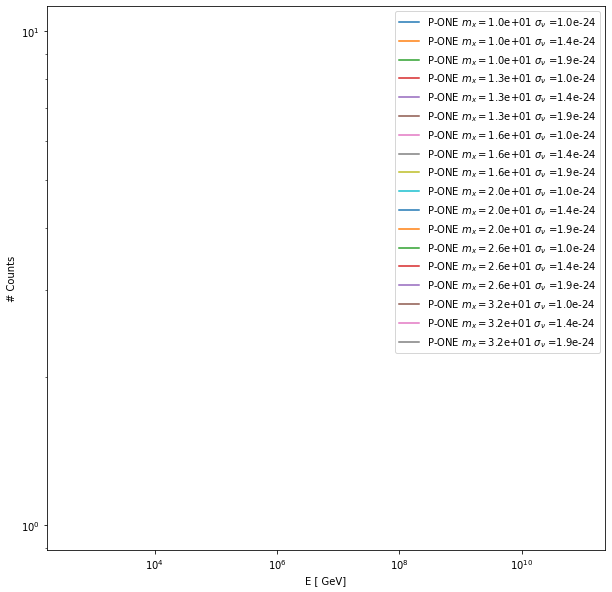

In [29]:
plt.figure(figsize=(10,10))
for i,_ in enumerate(signal_dict[44:]):
    for j,_ in enumerate(signal_dict[i][47:]):
        plt.step(e_grid[t:],signal_pone[i][j][t:],label=r'P-ONE $m_{x} = $'+'{:.1e}'.format(mass_grid[i])+r' $\sigma_{\nu}$ ='+ '{:.1e}'.format(sv_grid[j]))
        #plt.step(e_grid[t:],signal_dict[i][j],label=r'$m_{x} = $'+'{:.1e}'.format(mass_grid[i])+r' $\sigma_{\nu}$ ='+ '{:.1e}'.format(sv_grid[j]))

#plt.step(e_grid[t:], background[t:], label='background')

plt.ylabel('# Counts')
plt.xlabel('E [ GeV]')
plt.xscale('log')
plt.yscale('log')
plt.legend()


In [8]:
def ice_parser(filename):
    
        store = []
        with open(filename, newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row_num, row in enumerate(reader):
                if row_num == 0:
                    continue
                store.append(row[0].split())
        store = np.array(store, dtype=float)

        return store

In [9]:
def ice_parser(filename):
    
        store = []
        with open(filename, newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row_num, row in enumerate(reader):
                if row_num == 0:
                    continue
                store.append(row[0].split())
        store = np.array(store, dtype=float)

        return store


In [10]:
eff_areas = [
                    '../data/icecube_10year_ps/irfs/IC40_effectiveArea.csv',
                    '../data/icecube_10year_ps/irfs/IC59_effectiveArea.csv',
                    '../data/icecube_10year_ps/irfs/IC79_effectiveArea.csv',
                    '../data/icecube_10year_ps/irfs/IC86_I_effectiveArea.csv',
                    '../data/icecube_10year_ps/irfs/IC86_II_effectiveArea.csv',
                ]

eff_dic = {
                        0: ice_parser(eff_areas[0]),
                        1: ice_parser(eff_areas[1]),
                        2: ice_parser(eff_areas[2]),
                        3: ice_parser(eff_areas[3]),
                        4: ice_parser(eff_areas[4]),
                        5: ice_parser(eff_areas[4]),
                        6: ice_parser(eff_areas[4]),
                        7: ice_parser(eff_areas[4]),
                        8: ice_parser(eff_areas[4]),
                        9: ice_parser(eff_areas[4]),
                    }


In [11]:

year = 8
ch_egrid = (eff_dic[year][:, 1] + eff_dic[year][:, 0])/2.
ch_theta = (eff_dic[year][:, 2] + eff_dic[year][:, 3])/2.
loc_eff_area={}
for theta in config['atmospheric showers']['theta angles']:
    tmp_eff = []
    check_angle = (theta)
    for energy in e_grid:
        if energy < 1e1:
            tmp_eff.append(0)
        else:
            loge = np.log10(energy)
            idE = np.abs(ch_egrid - loge).argmin()
            all_near = (np.where(ch_egrid == ch_egrid[idE])[0])
            idTheta = np.abs(ch_theta[all_near] - check_angle).argmin()
            tmp_eff.append(eff_dic[year][all_near, -1][idTheta])
    loc_eff_area[theta] = np.array(tmp_eff)


In [12]:
loc_eff_area[5.0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.52000000e+00, 5.52000000e+00, 5.52000000e+00,
       5.52000000e+00, 5.52000000e+00, 5.52000000e+00, 5.52000000e+00,
       5.52000000e+00, 5.52000000e+00, 5.52000000e+00, 5.52000000e+00,
       5.52000000e+00, 4.22400000e+01, 4.22400000e+01, 1.72880000e+02,
       1.72880000e+02, 5.37350000e+02, 5.37350000e+02, 1.43335000e+03,
       1.43335000e+03, 3.57828000e+03, 3.57828000e+03, 8.30077000e+03,
       8.30077000e+03, 1.78956800e+04, 1.78956800e+04, 3.65920100e+04,
       3.65920100e+04, 6.88934400e+04, 6.88934400e+04, 1.28840440e+05,
       1.28840440e+05, 2.17484440e+05, 2.17484440e+05, 3.69041370e+05,
      

Text(0, 0.5, 'Effective Area $[m^2]$')

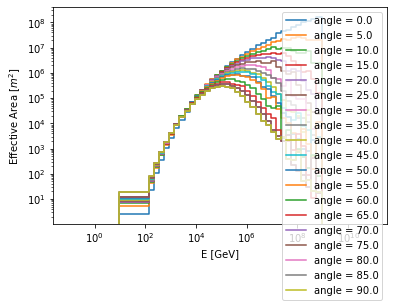

In [32]:
plt.figure()
for k in loc_eff_area.keys():
    plt.step(e_grid,loc_eff_area[k], label='angle = '+str(k))
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'Effective Area $[m^2]$')


In [36]:
limits_re = pickle.load(open('/home/kruteesh/Desktop/limits_results_IceCube.pkl','rb'))

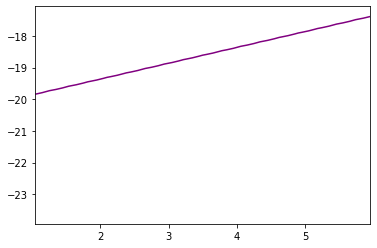

In [37]:

plt.contour(limits_re, levels=[0.9], colors='purple',
                origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                        min(np.log10(sv_grid)), max(np.log10(sv_grid))))


In [38]:
std_size = 15.  # Size of the plot
fontsize = 25.  # Fontsize in the plot
lw=0.5  # Linewidth
h_length=0.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export
name=[r'$\nu_{\mu}$',r'$\nu_{e}$',r'$\nu_{\tau}$']

# Loading comparison data

cl_lit = np.loadtxt('/home/kruteesh/Desktop/DM_nu_simulation_P-One/Literature/limits_Ice.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])


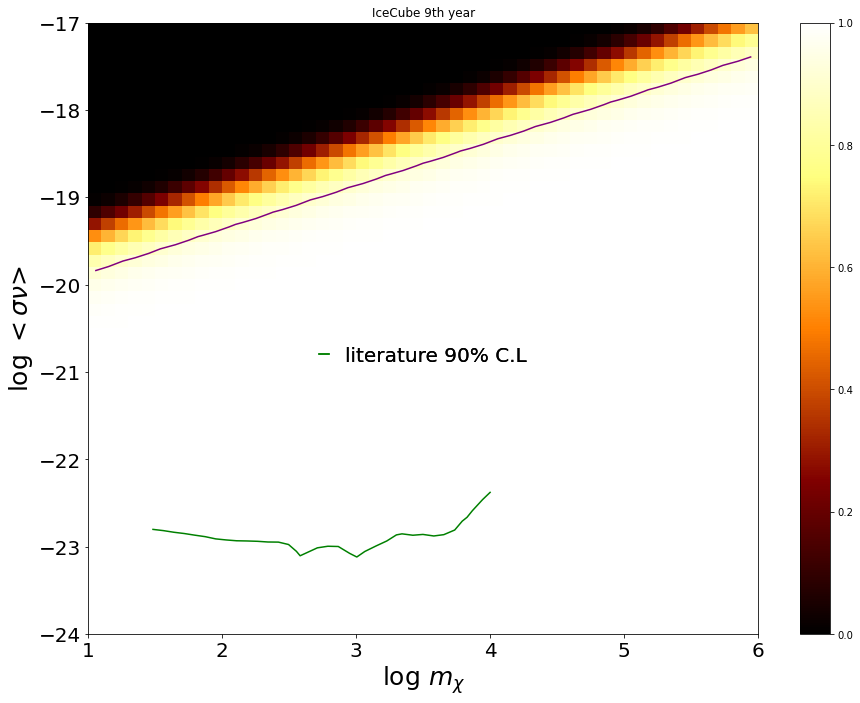

In [59]:
# Limits
# ---------------------------------------------
# Setup
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# ---------------------------------------------
# Plotting
plt.title('IceCube 9th year')
ax1.contour(limits_re, levels = [0.9], colors='purple',
             origin='lower',extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
pos = ax1.imshow(limits_re,origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                          min(np.log10(sv_grid)), max(np.log10(sv_grid))),
                 aspect='auto',cmap=plt.cm.afmhot)
figure.colorbar(pos, ax=ax1)
ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature 90% C.L')
# ---------------------------------------------
# Axis options
ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"$\log$ $m_{\chi}$", fontsize=fontsize)
ax1.set_ylabel(r"$\log$ $<\sigma \nu$>", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize-5)
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize-5)
ax1.set_xlim(min(np.log10(mass_grid)), max(np.log10(mass_grid)))
ax1.set_ylim(min(np.log10(sv_grid)), max(np.log10(sv_grid)))
# ---------------------------------------------
# Legend
# plt.legend(fontsize=fontsize)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +0.5),
                 ncol=2, fontsize=fontsize-5, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
# ---------------------------------------------
# Showing the image
plt.show()
# ---------------------------------------------
# Storing the image


array([1.00000000e-17, 7.19685673e-18, 5.17947468e-18, 3.72759372e-18,
       2.68269580e-18, 1.93069773e-18, 1.38949549e-18, 1.00000000e-18,
       7.19685673e-19, 5.17947468e-19, 3.72759372e-19, 2.68269580e-19,
       1.93069773e-19, 1.38949549e-19, 1.00000000e-19, 7.19685673e-20,
       5.17947468e-20, 3.72759372e-20, 2.68269580e-20, 1.93069773e-20,
       1.38949549e-20, 1.00000000e-20, 7.19685673e-21, 5.17947468e-21,
       3.72759372e-21, 2.68269580e-21, 1.93069773e-21, 1.38949549e-21,
       1.00000000e-21, 7.19685673e-22, 5.17947468e-22, 3.72759372e-22,
       2.68269580e-22, 1.93069773e-22, 1.38949549e-22, 1.00000000e-22,
       7.19685673e-23, 5.17947468e-23, 3.72759372e-23, 2.68269580e-23,
       1.93069773e-23, 1.38949549e-23, 1.00000000e-23, 7.19685673e-24,
       5.17947468e-24, 3.72759372e-24, 2.68269580e-24, 1.93069773e-24,
       1.38949549e-24, 1.00000000e-24])